In [23]:
%matplotlib notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import os
import itertools


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
%load_ext autoreload

In [3]:
%autoreload

In [4]:
bag_of_words = pd.read_csv('labor_discrim_whole.csv')

In [5]:
bag_of_words = pd.read_csv('labor_discrim_whole.csv')
columns = bag_of_words.columns[1:-5]
X = bag_of_words[columns].as_matrix()
y_indig_discrim = bag_of_words['indigenous_discrimination'].as_matrix()
y_reverse_discrim = bag_of_words['reverse_discrimination'].as_matrix()
y_discrim = bag_of_words['discrimination'].as_matrix()
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=22)
skf.get_n_splits(X, y_indig_discrim)
for train_index, test_index in skf.split(X, y_indig_discrim):
    X_train, X_test  = X[train_index], X[test_index]
    y_train_indig, y_test_indig = y_indig_discrim[train_index], y_indig_discrim[test_index]

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Indiginous Discrimination Only

In [42]:
skf.get_n_splits(X, y_indig_discrim)
for train_index, test_index in skf.split(X, y_indig_discrim):
    X_train, X_test  = X[train_index], X[test_index]
    y_train_indig, y_test_indig = y_indig_discrim[train_index], y_indig_discrim[test_index]

In [43]:
indig_clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train_indig)

In [44]:
indig_discrim_score = indig_clf.score(X_test, y_test_indig)
y_pred = indig_clf.predict(X_test)

<IPython.core.display.Javascript object>


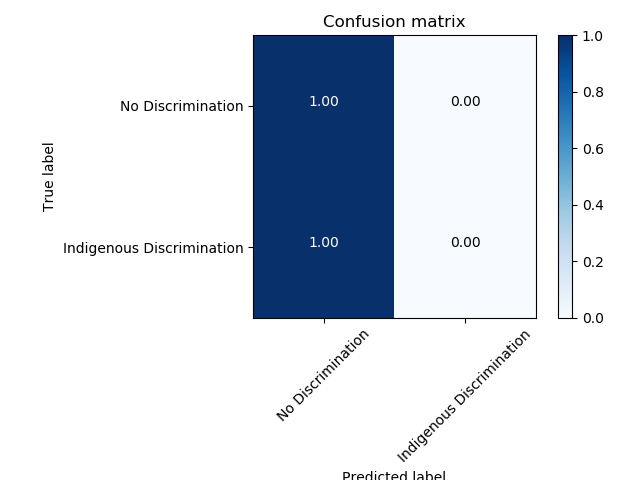

Normalized confusion matrix
[[  9.991e-01   9.091e-04]
 [  1.000e+00   0.000e+00]]


In [45]:
indig_cnf_matrix = confusion_matrix(y_test_indig, y_pred)
np.set_printoptions(precision=3)
plt.figure()
plot_confusion_matrix(indig_cnf_matrix, classes = ['No Discrimination', 'Indigenous Discrimination'], normalize=True)
# plt.show()
plt.savefig('Indig_Discrim_Classification.png')

### Reverse Discrimination Only

In [28]:
skf.get_n_splits(X, y_reverse_discrim)
for train_index, test_index in skf.split(X, y_reverse_discrim):
    X_train, X_test  = X[train_index], X[test_index]
    y_train_reverse, y_test_reverse = y_reverse_discrim[train_index], y_reverse_discrim[test_index]

In [31]:
revdiscrim_clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train_reverse)
rev_discrim_score = revdiscrim_clf.score(X_test, y_test_reverse)
y_pred = revdiscrim_clf.predict(X_test)


<IPython.core.display.Javascript object>


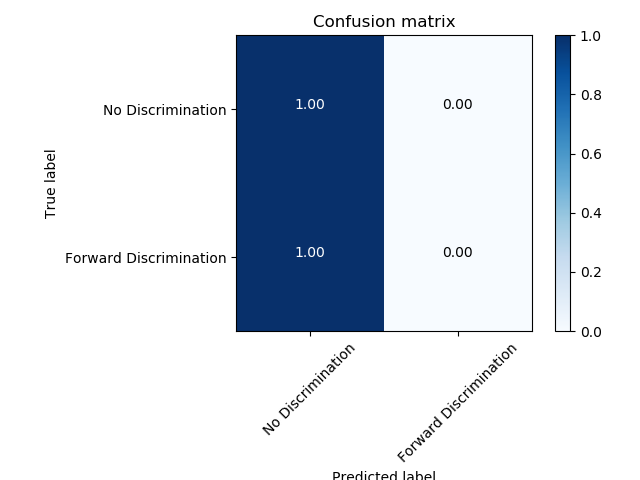

Normalized confusion matrix
[[ 0.997264  0.002736]
 [ 1.        0.      ]]


In [35]:
rev_cnf_matrix = confusion_matrix(y_test_reverse, y_pred)
plt.figure()
np.set_printoptions(precision=6)
plot_confusion_matrix(rev_cnf_matrix, classes = ['No Discrimination', 'Forward Discrimination'], normalize=True)
# plt.show()
plt.savefig('Rev_Discrim_Classification.png')

### All Discrimination

In [38]:
skf.get_n_splits(X, y_discrim)
for train_index, test_index in skf.split(X, y_reverse_discrim):
    X_train, X_test  = X[train_index], X[test_index]
    y_train, y_test = y_discrim[train_index], y_discrim[test_index]

In [39]:
discrim_clf = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
rev_discrim_score = discrim_clf.score(X_test, y_test)
y_pred = revdiscrim_clf.predict(X_test)


<IPython.core.display.Javascript object>


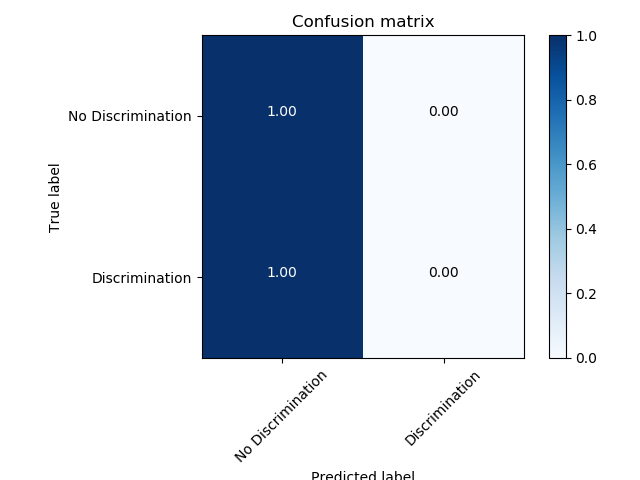

Normalized confusion matrix
[[ 0.997171  0.002829]
 [ 1.        0.      ]]


In [41]:
discrim_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
np.set_printoptions(precision=6)
plot_confusion_matrix(discrim_cnf_matrix, classes = ['No Discrimination', 'Discrimination'], normalize=True)
# plt.show()
plt.savefig('Discrim_Classification.png')